### KNN Classifier Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


### Data Preprocess

In [3]:
df = pd.read_csv("../data/diabetes.csv")

In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
251,2,129,84,0,0,28.0,0.284,27,0
342,1,0,68,35,0,32.0,0.389,22,0
528,0,117,66,31,188,30.8,0.493,22,0
138,0,129,80,0,0,31.2,0.703,29,0
203,2,99,70,16,44,20.4,0.235,27,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This parameters is important to measure diabetes values and not accepted zero or nan.
- Glucose,
- BloodPressure,
- SkinThickness,
- Insulin and
- BMI.



In [7]:
not_zero_columns = ["Glucose",	"BloodPressure", "SkinThickness", "Insulin", "BMI"]

for column in not_zero_columns:
    df[column] = df[column].replace(0, np.NAN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NAN,mean)

In [8]:
df.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
532,1,86.0,66.0,52.0,65.0,41.3,0.917,29,0
24,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1
121,6,111.0,64.0,39.0,155.0,34.2,0.260,24,0
529,0,111.0,65.0,29.0,155.0,24.6,0.660,31,0
271,2,108.0,62.0,32.0,56.0,25.2,0.128,21,0
41,7,133.0,84.0,29.0,155.0,40.2,0.696,37,0
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23,1


### Data Modelling

#### train test split

In [9]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]
# y = Outcome column, X = columns of rest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#### feature scalling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### KNN Model

In [11]:
# Looking to desicion k of number
import math 
math.sqrt(len(y_test))


12.409673645990857

In [12]:
neigh11 = KNeighborsClassifier(n_neighbors=11,p=2, metric="euclidean")

neigh11.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [13]:
y_pred = neigh11.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [14]:
confusion = confusion_matrix(y_test, y_pred)
print(f" confusion_matrix :\n {confusion} ")

accuracy =accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score : ",precision)

recall = recall_score(y_test, y_pred)
print("Recall Score : ",recall)

f1 = f1_score(y_test,y_pred)
print("F1 Score: ",f1)

 confusion_matrix :
 [[95 12]
 [18 29]] 
Accuracy :  0.8051948051948052
Precision Score :  0.7073170731707317
Recall Score :  0.6170212765957447
F1 Score:  0.6590909090909092


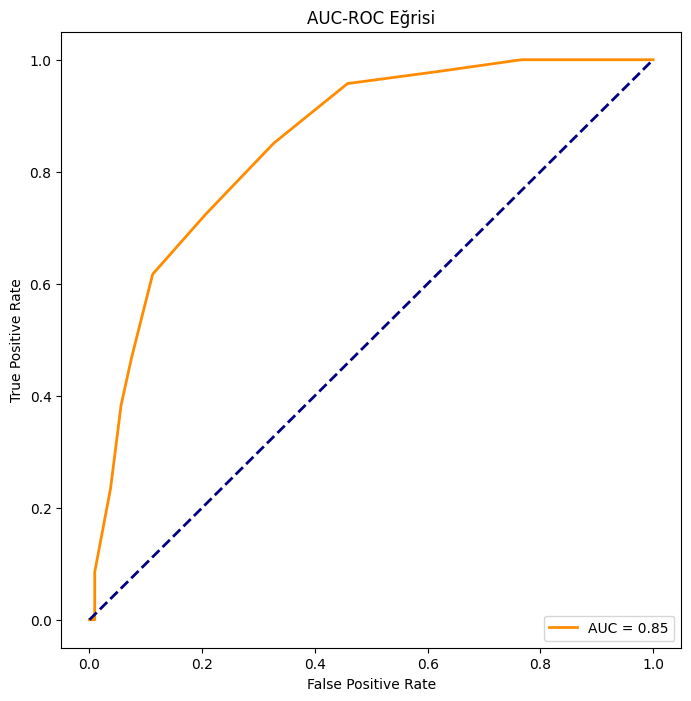

In [15]:
y_prob = neigh11.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()